<a href="https://colab.research.google.com/github/minhhhhhh/Machine-Learning-Model/blob/main/Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This project is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree.
The assignment is divided into two sections, each for one unique ML algorithm.

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


##Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [ ]:
# import all required libraries
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
#Please change path when use
#basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

#Local path
basePath = "/content/gdrive/My Drive/HW3/"


#Stochastic Gradient Descent

In this section, you will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data.


##Algorithm



Following are the data files that will be provided to you for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments.



In [ ]:
# Data file name variables
train_file_path = basePath + "gd-train.dat"
test_file_path = basePath + "gd-test.dat"


In [ ]:
# Read the training and testing data files
with open(train_file_path, 'r') as train_file:
  next(train_file)
  training_data = [line.strip().split() for line in train_file]

with open(test_file_path, 'r') as test_file:
  next(test_file)
  testing_data = [line.strip().split() for line in test_file]

testing_data = testing_data[:-1]
test_data = np.array(testing_data, dtype=float)
train_data = np.array(training_data, dtype=float)


In [ ]:
# Activation Function - implement Sigmoid
def activation_function(h):
  return 1 / (1 + np.exp(-h))
    # given 'h' compute and return 'z' based on the activation function implemented


In [ ]:
def train(train_data, learning_rate=0.05):
    num_features = train_data.shape[1] - 1
    weights = np.zeros(num_features + 1)

    for data_point in train_data:
        features = data_point[:-1]
        label = data_point[-1]
        features_with_bias = np.append(features, 1)
        activation = np.dot(weights, features_with_bias)
        weights += learning_rate * (label - activation) * features_with_bias
    return weights

In [ ]:
def test(test_data, weights, threshold=0):
    num_correct = 0
    num_total = len(test_data)


    for instance in test_data:
        features = instance[:-1]
        label = instance[-1]
        features_with_bias = np.append(features, 1)
        activation = np.dot(weights, features_with_bias)
        if activation >= threshold:
            predicted_label = 1
        else:
            predicted_label = 0

        if predicted_label == label:
            num_correct += 1

    # Calculate accuracy
    accuracy = num_correct / num_total
    return accuracy


In [ ]:
def gradient_descent(df_train, df_test, learning_rate=0.05, threshold=0.5):
    # Train the model and obtain the weights
    weights = train(df_train, learning_rate)

    # Evaluate training accuracy
    train_accuracy = test(df_train, weights, threshold)

    # Evaluate testing accuracy
    test_accuracy = test(df_test, weights, threshold)

    # Return (training accuracy, testing accuracy)
    return (train_accuracy, test_accuracy)

In [ ]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
threshold = 0.5


In [ ]:
# Define the range of learning rates to iterate over
learning_rates = [0.05, 1]

# Loop through all the different learning rates
for learning_rate in learning_rates:
    # Call the gradient descent function to obtain the train and test accuracy values
    train_accuracy, test_accuracy = gradient_descent(train_data, test_data, learning_rate)

    # Print the accuracy values
    print(f"Accuracy for LR of {learning_rate} on Training set = {train_accuracy * 100:.2f}%")
    print(f"Accuracy for LR of {learning_rate} on Testing set = {test_accuracy * 100:.2f}%")



Accuracy for LR of 0.5 on Training set = 68.00%
Accuracy for LR of 0.5 on Testing set = 72.25%
Accuracy for LR of 1 on Training set = 68.00%
Accuracy for LR of 1 on Testing set = 72.25%


##Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



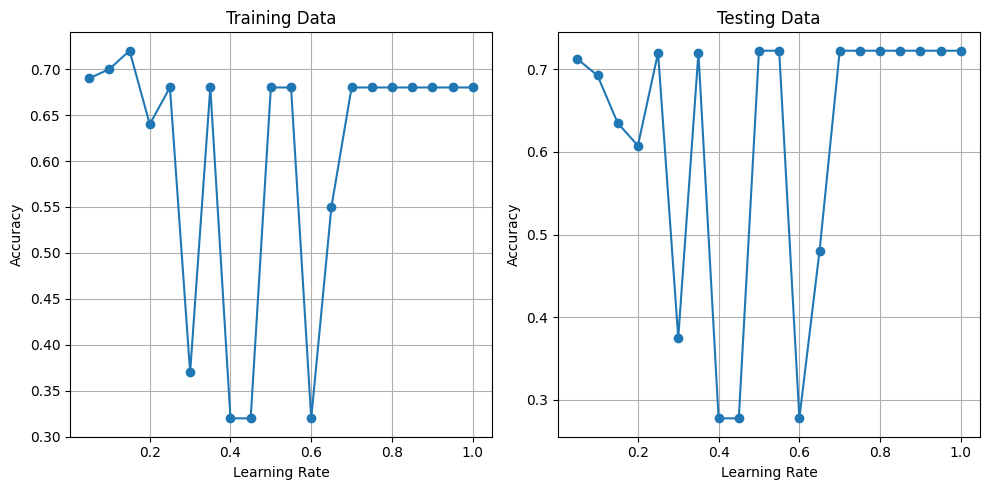

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Define the range of learning rates to iterate over
learning_rates = np.arange(0.05, 1.05, 0.05)

# Loop through all the different learning rates
for learning_rate in learning_rates:
    # Call the gradient descent function to obtain the train and test accuracy values
    train_accuracy, test_accuracy = gradient_descent(train_data, test_data, learning_rate)

    # Append accuracy values to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the graphs
plt.figure(figsize=(10, 5))

# Plot for training data
plt.subplot(1, 2, 1)
plt.plot(learning_rates, train_accuracies, marker='o')
plt.title('Training Data')
plt.xlabel('Learning Rate')
plt.ylabel('Training Accuracy')
plt.grid(True)

# Plot for testing data
plt.subplot(1, 2, 2)
plt.plot(learning_rates, test_accuracies, marker='o')
plt.title('Testing Data')
plt.xlabel('Learning Rate')
plt.ylabel('Testing Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that there are **no missing values** in the train or test data.


## Algorithm

(85 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1 -- 4
            attr3 = 1 : 0 -- 9
        attr2 = 1 :
            attr4 = 0 : 0 -- 2
            attr4 = 1 : 1 -- 10
    attr1 = 1 :
        attr2 = 1 : 1 -- 17

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [ ]:
# Data file name variables
train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"


In [ ]:
# Function to calculate entropy
def entropy(data):
    class_counts = np.unique(data[:, -1], return_counts=True)[1]
    total_instances = np.sum(class_counts)
    probabilities = class_counts / total_instances
    entropy_value = -np.sum(probabilities * np.log2(probabilities))
    return entropy_value

# Function to calculate information gain
def information_gain(data, attribute_index):
    total_entropy = entropy(data)
    attribute_values, counts = np.unique(data[:, attribute_index], return_counts=True)
    weighted_entropy = 0
    for value, count in zip(attribute_values, counts):
        subset = data[data[:, attribute_index] == value]
        subset_entropy = entropy(subset)
        weighted_entropy += (count / len(data)) * subset_entropy
    return total_entropy - weighted_entropy

# Function to select the best attribute to split on
def select_best_attribute(data, attributes_remaining):
    information_gains = [information_gain(data, i) for i in attributes_remaining]
    best_attribute_index = np.argmax(information_gains)
    return best_attribute_index

# Function to create the decision tree
def ID3(data, root, attributes_remaining):
    # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
    if len(np.unique(data[:, -1])) == 1:
        return int(data[0, -1])

    # If all the instances have only one class label
    if len(attributes_remaining) == 0:
        class_counts = np.unique(data[:, -1], return_counts=True)[1]
        return np.argmax(class_counts)

    # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
    if len(attributes_remaining) == 1:
        class_counts = np.unique(data[:, -1], return_counts=True)[1]
        return np.argmax(class_counts)

    # Find the best attribute to split
    best_attribute_index = select_best_attribute(data, attributes_remaining)
    best_attribute_value = attributes_remaining[best_attribute_index]

    # Create subtree
    root[best_attribute_value] = {}
    remaining_attributes = np.delete(attributes_remaining, best_attribute_index)
    attribute_values = np.unique(data[:, best_attribute_value])
    for value in attribute_values:
        subset = data[data[:, best_attribute_value] == value]
        if len(subset) == 0:
            class_counts = np.unique(data[:, -1], return_counts=True)[1]
            root[best_attribute_value][value] = np.argmax(class_counts)
        else:
            root[best_attribute_value][value] = ID3(subset, {}, remaining_attributes)

    return root

# Function to classify an instance using the decision tree
def classify(instance, tree):
    for attr, subtree in tree.items():
        value = instance[attr]
        if value in subtree:
            if isinstance(subtree[value], dict):
                return classify(instance, subtree[value])
            else:
                return subtree[value]

# Function to calculate accuracy
def accuracy(data, tree):
    correct = 0
    for instance in data:
        if classify(instance[:-1], tree) == instance[-1]:
            correct += 1
    return (correct / len(data)) * 100

# Load data
train_data = np.loadtxt(train, dtype=int, delimiter='\t', skiprows=1)
test_data = np.loadtxt(test, dtype=int, delimiter='\t', skiprows=1)

# Get attribute names
with open(train, 'r') as f:
    attributes = f.readline().strip().split('\t')  # Modified this line

# Check if the number of attributes matches the number of columns in the data
if len(attributes) != train_data.shape[1] - 1:
    print("Error: The number of attributes does not match the number of columns in the data.")
    exit()

# Initialize root node
root = {}

# Build decision tree
ID3(train_data, root, list(range(train_data.shape[1] - 1)))

# Print the decision tree
def print_tree(tree, depth=0):
    for attr, subtree in tree.items():
        if isinstance(subtree, dict):
            print('  ' * depth + attributes[attr] + " = " + str(attr))
            print_tree(subtree, depth + 1)
        else:
            print('  ' * depth + attributes[attr] + " = " + str(attr) + " : " + str(subtree))

print_tree(root)

# Calculate accuracy
train_accuracy = accuracy(train_data, root)
test_accuracy = accuracy(test_data, root)

print("Accuracy on the Training data = {:.2f} %".format(train_accuracy))
print("Accuracy on the Test data = {:.2f} %".format(test_accuracy))


Error: The number of attributes does not match the number of columns in the data.
attr5 = 4
  attr1 = 0
    attr6 = 5
      attr1 = 0
        attr2 = 1
          attr1 = 0
            attr1 = 0
              attr1 = 0
                attr4 = 3
                  attr1 = 0 : 0
                  attr2 = 1 : 0
              attr2 = 1
                attr4 = 3
                  attr1 = 0 : 0
                  attr2 = 1 : 0
          attr2 = 1
            attr4 = 3
              attr1 = 0
                attr3 = 2
                  attr1 = 0 : 0
                  attr2 = 1 : 0
              attr2 = 1
                attr1 = 0
                  attr1 = 0 : 0
                  attr2 = 1 : 0
      attr2 = 1
        attr4 = 3
          attr1 = 0
            attr2 = 1
              attr1 = 0
                attr3 = 2
                  attr1 = 0 : 0
                  attr2 = 1 : 0
              attr2 = 1
                attr1 = 0
                  attr1 = 0 : 0
                  attr2 = 1 : 0
    